# Import Packages

In [40]:
# Import packages
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [41]:
# logs_df = pd.read_csv("../Data Cleaning/cleaned_dataset.csv")
logs_df = pd.read_csv("cleaned_dataset.csv")
# logs_df = pd.read_csv("cleaned_dataset_all.csv")
logs_df

,RXASP,RXHEP,FDEAD,FDENNIS,FRECOVER,RXHEP_1,TREATMENT,REWARD_BERNOULLI,REWARD_CATEGORICAL,REWARD_VALUE (BER),REWARD_VALUE (CAT)
0,N,L,N,N,Y,L,2,Alive,Alive and recovered,1,0.274168
1,Y,N,Y,NaN,NaN,N,3,Dead,Dead,0,0.419251
2,Y,N,N,Y,N,N,3,Alive,Alive and still dependent,1,0.301196
3,N,N,N,N,N,N,1,Alive,Alive and recovered,1,0.274168
4,N,L,N,N,Y,L,2,Alive,Alive and recovered,1,0.274168
...,...,...,...,...,...,...,...,...,...,...,...
2495,Y,N,N,Y,N,N,3,Alive,Alive and still dependent,1,0.301196
2496,Y,L,N,N,N,L,4,Alive,Alive and recovered,1,0.274168
2497,Y,N,Y,NaN,NaN,N,3,Dead,Dead,0,0.419251
2498,N,N,N,Y,N,N,1,Alive,Alive and still dependent,1,0.301196


In [42]:
logs_df_1 = sum(logs_df[logs_df["TREATMENT"] == 1]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[1]
logs_df_2 = sum(logs_df[logs_df["TREATMENT"] == 2]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[2]
logs_df_3 = sum(logs_df[logs_df["TREATMENT"] == 3]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[3]
logs_df_4 = sum(logs_df[logs_df["TREATMENT"] == 4]["REWARD_VALUE (BER)"]) / logs_df["TREATMENT"].value_counts()[4]
print(logs_df_1)
print(logs_df_2)
print(logs_df_3)
print(logs_df_4)

0.7752126366950183
0.7557603686635944
0.7579462102689487
0.7952941176470588


In [43]:
logs_df_1 = sum(logs_df[logs_df["TREATMENT"] == 1]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[1]
logs_df_2 = sum(logs_df[logs_df["TREATMENT"] == 2]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[2]
logs_df_3 = sum(logs_df[logs_df["TREATMENT"] == 3]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[3]
logs_df_4 = sum(logs_df[logs_df["TREATMENT"] == 4]["REWARD_VALUE (CAT)"]) / logs_df["TREATMENT"].value_counts()[4]
print(logs_df_1)
print(logs_df_2)
print(logs_df_3)
print(logs_df_4)

0.3149070322566784
0.31826631902629327
0.3193672073373163
0.3137916855760045


# Arms

In [4]:
# Define the BernoulliArm class
class BernoulliArm():
    def __init__(self, p):
        self.p = p
        
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0

In [5]:
# Define the CategoricalArm class
class CategoricalArm():
    def __init__(self, p):
        self.p = p
        
    def draw(self):
        if random.random() > self.p:
            return 0.0
        else:
            return 1.0
        
        pi = random.random()
        if pi > self.p:
            return 'Dead'
        elif pi > ():
            return 'Alive and still dependent'
        elif pi > ():
            return 'Alive and recovered '
        else:
            return 'Alive with unknown status'
        
    # p is from normalisation of reward_value (cat)
    # count 

In [ ]:
[0.5, 0.2, 0.3]

# Algorithms
* Epsilon Greedy
* Softmax

## Epsilon Greedy

In [6]:
# Implement the EpsilonGreedy class
class EpsilonGreedy():
    
    def __init__(self, epsilon, counts, values): 
        self.epsilon = epsilon
        self.counts = counts
        self.values = values
        return 
    
    def initialize(self, n_arms):
        self.counts = [0 for item in range(n_arms)]
        self.values = [0.0 for item in range(n_arms)]
        return
    
    def select_arm(self):
        if random.random() > self.epsilon:
            m = max(self.values)
            return self.values.index(m)
        else:
            return random.randrange(len(self.values))
        
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
        self.values[chosen_arm] = new_value
        return

In [ ]:
# Implement the EpsilonGreedyCat class
class EpsilonGreedyCategorical():
    
    def init(self, epsilon, counts, values, total): 
        self.epsilon = epsilon
        self.counts = counts
        #[{"reward1": count1, "reward2": count2}, {..}]
        self.values = values
        #["reward1", "reward3, ...]
        self.total = total
        return 
    
    def initialize(self, n_arms):
        keyList = ['Dead','Alive and still dependent','Alive and recovered', 'Alive with unknown status']
        arm_dict = dict(zip(keyList, [0]*len(keyList)))
        self.counts = [arm_dict for item in range(n_arms)]
        self.values = ['' for item in range(n_arms)]
        self.total = [0 for item in range(n_arms)]
        return
    
    def select_arm(self):
        if random.random() > self.epsilon:
            m = max(self.total)
            return self.total.index(m)
        else:
            return random.randrange(len(self.values))
        
    def update(self, chosen_arm, reward):
        self.total[chosen_arm] = self.total[chosen_arm] + 1
        indv_dict = self.counts[chosen_arm]
        indv_dict[reward] += 1
        sum_values = self.total[chosen_arm]
        new_dict = indv_dict
        for x, y in new_dict.items():
            new_dict[x] = y/sum_values
        max_reward = max(new_dict, key=new_dict.get)
        self.values[chosen_arm] = max_reward
        return

## Softmax

In [7]:
class Softmax():
    
    def __init__(self, temperature, counts, values):
        self.temperature = temperature
        self.counts = counts
        self.values = values
        return
    
    def initialize(self, n_arms):
        self.counts = [0 for item in range(n_arms)]
        self.values = [0.0 for item in range(n_arms)]
        return
        
    def select_arm(self):
        z=sum([math.exp(v/self.temperature) for v in self.values])
        probs=[math.exp(v/self.temperature)/z for v in self.values]
        current_choice = np.random.choice(n_arms, p=probs)
        return current_choice
    
    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm] 
        value = self.values[chosen_arm]
        new_value = ((n-1)/float(n))*value+(1/float(n))*reward
        self.values[chosen_arm] = new_value
        return

# Simulation and Tuning

In [8]:
# Implement Simulation Test
def test_algorithm(algo, arms, n_sims, horizon):
    chosen_arms = [0 for i in range(n_sims * horizon)]
    rewards = [0 for i in range(n_sims * horizon)]
    cumulative_rewards = [0 for i in range(n_sims * horizon)]
    sim_rounds = [0 for i in range(n_sims * horizon)]
    time_steps = [0 for i in range(n_sims * horizon)]
    
    for sim in range(n_sims):
        sim = sim + 1
        algo.initialize(len(arms))
        
        for t in range(horizon):
            t = t + 1
            index = (sim-1) * horizon + t - 1
            sim_rounds[index] = sim
            time_steps[index] = t
            
            chosen_arm = algo.select_arm()
            chosen_arms[index] = chosen_arm
            reward = arms[chosen_arm].draw()
            rewards[index] = reward
            
            if t == 1:
                cumulative_rewards[index] = reward
            else:
                cumulative_rewards[index] = cumulative_rewards[index - 1] + reward 
            
            algo.update(chosen_arm, reward)

    return (sim_rounds, time_steps, chosen_arms, rewards, cumulative_rewards)

In [9]:
random.seed(4014) # to make sure that I can regenerate the results

# Initialise probabilities
success_probabilities = [0.9, 0.5, 0.8, 0.4]

no_of_treatments = len(success_probabilities)
test_treatments = list(map(lambda mu: BernoulliArm(mu), success_probabilities))

# Number of arms
n_arms = len(success_probabilities)

# Initialise no of simulations
no_of_simulations = 1000

# Initialise no of steps (no of patients)
no_of_steps = 3000

# Epsilon values
epsilon_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Temperature values
tau_values = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9]

# Create all_results dataframe
all_results_epsilon = pd.DataFrame(columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"])
all_results_softmax = pd.DataFrame(columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"])

## Epsilon Greedy

In [10]:
# Loop to simulate
for epsilon in epsilon_values:
    eg_algo = EpsilonGreedy(epsilon, [], [])
    eg_algo.initialize(n_arms)
    results_epsilon = pd.DataFrame(test_algorithm(eg_algo, test_treatments, no_of_simulations, no_of_steps)).transpose()
    results_epsilon.columns = ["n_sim", "n_step", "chosen_treatment", "rewards", "cumulative_rewards"]
    results_epsilon["epsilon"] = epsilon
    all_results_epsilon = pd.concat([all_results_epsilon, results_epsilon])

In [11]:
all_results_epsilon

,n_sim,n_step,chosen_treatment,rewards,cumulative_rewards,epsilon
0,1.0,1.0,0.0,1.0,1.0,0.1
1,1.0,2.0,0.0,1.0,2.0,0.1
2,1.0,3.0,0.0,1.0,3.0,0.1
3,1.0,4.0,0.0,0.0,3.0,0.1
4,1.0,5.0,0.0,1.0,4.0,0.1
...,...,...,...,...,...,...
2999995,1000.0,2996.0,0.0,0.0,1998.0,0.9
2999996,1000.0,2997.0,1.0,1.0,1999.0,0.9
2999997,1000.0,2998.0,2.0,0.0,1999.0,0.9
2999998,1000.0,2999.0,2.0,1.0,2000.0,0.9


In [12]:
# If chosen_treatment = to the treatment with highest click_probability, return 1 else 0
all_results_epsilon['if_best_treatment'] = np.where(all_results_epsilon['chosen_treatment'] == success_probabilities.index(max(success_probabilities)), 1, 0)

# Group by epsilon and n_step,
results_plot_epsilon = all_results_epsilon.groupby(['epsilon', 'n_step'], as_index = False).aggregate({'if_best_treatment': lambda x: x.sum() / float(x.count()), "rewards":"mean", "cumulative_rewards":"mean"})

In [13]:
results_plot_epsilon

,epsilon,n_step,if_best_treatment,rewards,cumulative_rewards
0,0.1,1.0,0.927,0.889,0.889
1,0.1,2.0,0.880,0.878,1.767
2,0.1,3.0,0.877,0.855,2.622
3,0.1,4.0,0.871,0.871,3.493
4,0.1,5.0,0.870,0.861,4.354
...,...,...,...,...,...
26995,0.9,2996.0,0.318,0.674,2022.558
26996,0.9,2997.0,0.317,0.685,2023.243
26997,0.9,2998.0,0.311,0.662,2023.905
26998,0.9,2999.0,0.328,0.669,2024.574


Text(0.5, 1.0, 'The probability of choosing the best treatment')

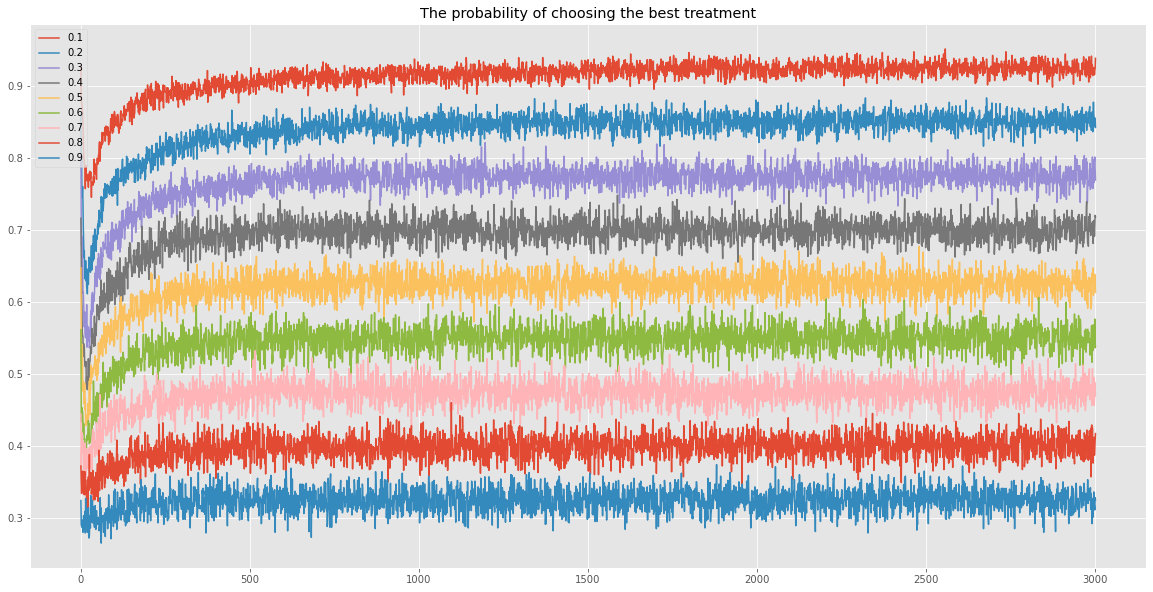

In [14]:
plt.style.use('ggplot')

# Plot the probability of choosing the best movie
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)
for epsilon in results_plot_epsilon['epsilon'].unique():
    results_epsilon = results_plot_epsilon[results_plot_epsilon['epsilon'] == epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['if_best_treatment'], label = str(epsilon))

plt.legend() 
plt.title("The probability of choosing the best treatment")

Text(0.5, 1.0, 'Average rewards at each time step')

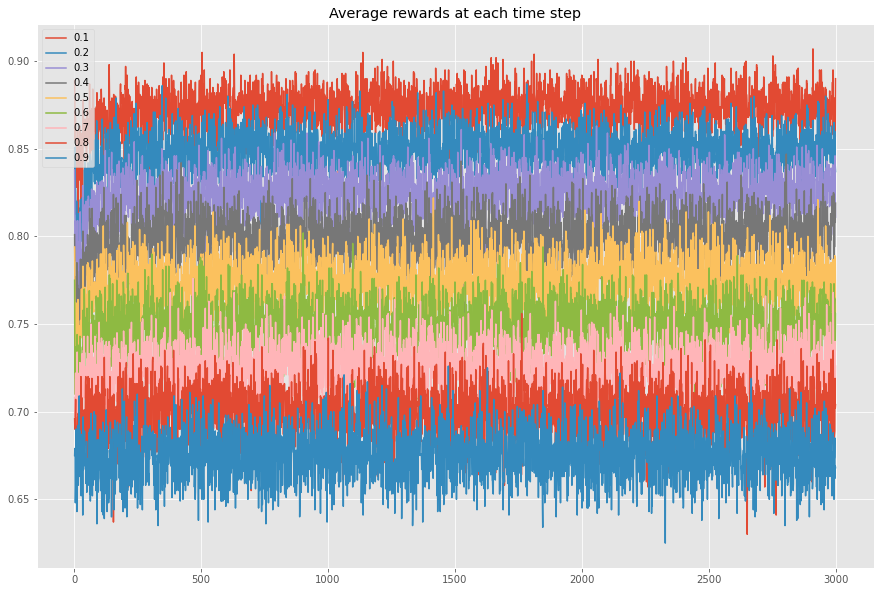

In [15]:
# plot the rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_epsilon['epsilon'].unique():
    results_epsilon = results_plot_epsilon[results_plot_epsilon['epsilon'] == epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['rewards'],label=str(epsilon))

plt.legend()
plt.title("Average rewards at each time step")

In [16]:
# Determine the cumulative reward at 1000 time step
results_plot_epsilon[results_plot_epsilon["n_step"] == 3000]

,epsilon,n_step,if_best_treatment,rewards,cumulative_rewards
2999,0.1,3000.0,0.938,0.890,2619.560
5999,0.2,3000.0,0.842,0.837,2545.381
8999,0.3,3000.0,0.769,0.811,2471.009
11999,0.4,3000.0,0.718,0.819,2396.984
14999,0.5,3000.0,0.613,0.757,2323.017
17999,0.6,3000.0,0.539,0.756,2247.408
20999,0.7,3000.0,0.473,0.726,2174.232
23999,0.8,3000.0,0.417,0.704,2098.569
26999,0.9,3000.0,0.325,0.668,2025.242


Text(0.5, 1.0, 'Cumulative rewards at each step')

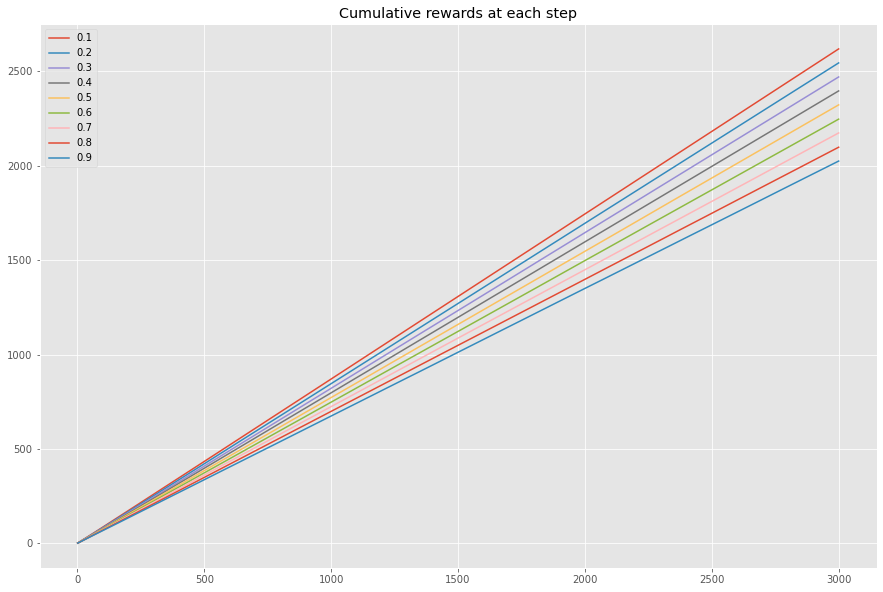

In [17]:
# Plot the cumulative rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_epsilon['epsilon'].unique():
    results_epsilon = results_plot_epsilon[results_plot_epsilon['epsilon'] == epsilon]
    ax.plot(results_epsilon['n_step'], results_epsilon['cumulative_rewards'], label = str(epsilon))

plt.legend()
plt.title("Cumulative rewards at each step")

## Softmax

In [18]:
for temperature in tau_values:
    algo = Softmax(temperature, [], [])
    algo.initialize(n_arms)
    results_softmax = pd.DataFrame(test_algorithm(algo, test_treatments, no_of_simulations, no_of_steps)).transpose()
    results_softmax.columns=['n_sim','n_step','chosen_treatment','rewards','cumulative_rewards']
    results_softmax['temperature'] = temperature
    all_results_softmax = pd.concat([all_results_softmax, results_softmax])

In [19]:
all_results_softmax

,n_sim,n_step,chosen_treatment,rewards,cumulative_rewards,temperature
0,1.0,1.0,0.0,1.0,1.0,0.01
1,1.0,2.0,0.0,1.0,2.0,0.01
2,1.0,3.0,0.0,1.0,3.0,0.01
3,1.0,4.0,0.0,1.0,4.0,0.01
4,1.0,5.0,0.0,1.0,5.0,0.01
...,...,...,...,...,...,...
2999995,1000.0,2996.0,3.0,1.0,2070.0,0.90
2999996,1000.0,2997.0,1.0,1.0,2071.0,0.90
2999997,1000.0,2998.0,3.0,0.0,2071.0,0.90
2999998,1000.0,2999.0,3.0,1.0,2072.0,0.90


In [20]:
# If chosen_treatment = to the treatment with highest click_probability, return 1 else 0
all_results_softmax['if_best_treatment'] = np.where(all_results_softmax['chosen_treatment'] == success_probabilities.index(max(success_probabilities)), 1, 0)

# Group by epsilon and n_step,
results_plot_softmax = all_results_softmax.groupby(['temperature', 'n_step'], as_index = False).aggregate({'if_best_treatment': lambda x: x.sum() / float(x.count()), "rewards":"mean", "cumulative_rewards":"mean"})

In [21]:
results_plot_softmax

,temperature,n_step,if_best_treatment,rewards,cumulative_rewards
0,0.01,1.0,0.254,0.645,0.645
1,0.01,2.0,0.335,0.699,1.344
2,0.01,3.0,0.351,0.731,2.075
3,0.01,4.0,0.355,0.716,2.791
4,0.01,5.0,0.358,0.700,3.491
...,...,...,...,...,...
23995,0.90,2996.0,0.328,0.713,2087.527
23996,0.90,2997.0,0.330,0.686,2088.213
23997,0.90,2998.0,0.347,0.718,2088.931
23998,0.90,2999.0,0.307,0.691,2089.622


Text(0.5, 1.0, 'The probability of choosing the best treatment')

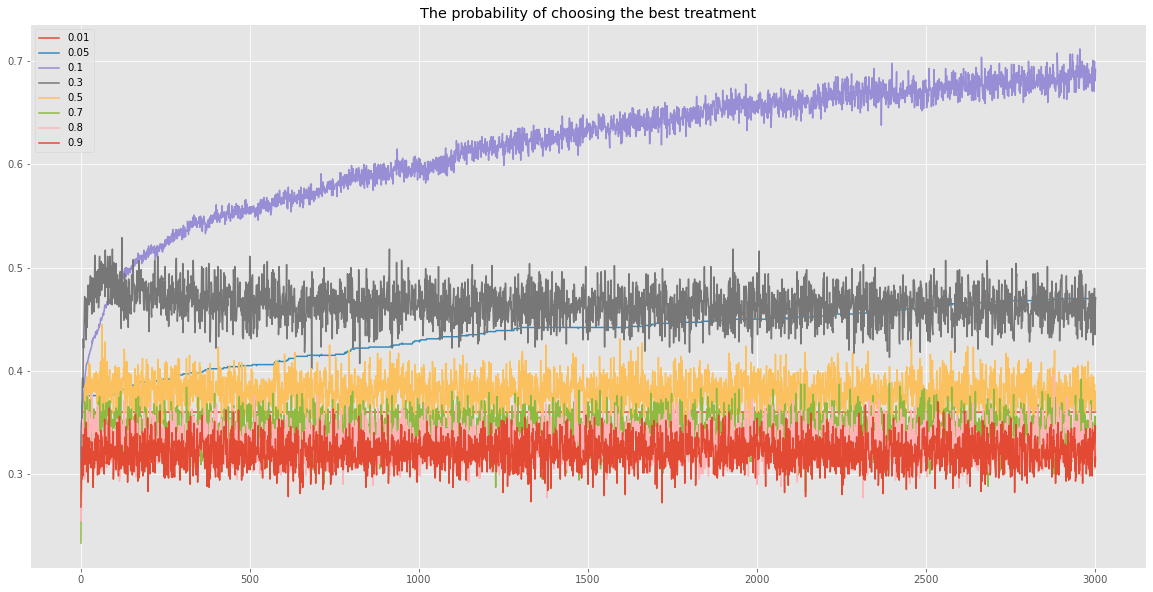

In [22]:
plt.style.use('ggplot')

# Plot the probability of choosing the best movie
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111)

for tau in results_plot_softmax['temperature'].unique():
    results_softmax = results_plot_softmax[results_plot_softmax['temperature'] == tau]
    ax.plot(results_softmax['n_step'], results_softmax['if_best_treatment'], label = str(tau))

plt.legend() 
plt.title("The probability of choosing the best treatment")

Text(0.5, 1.0, 'Average rewards at each time step')

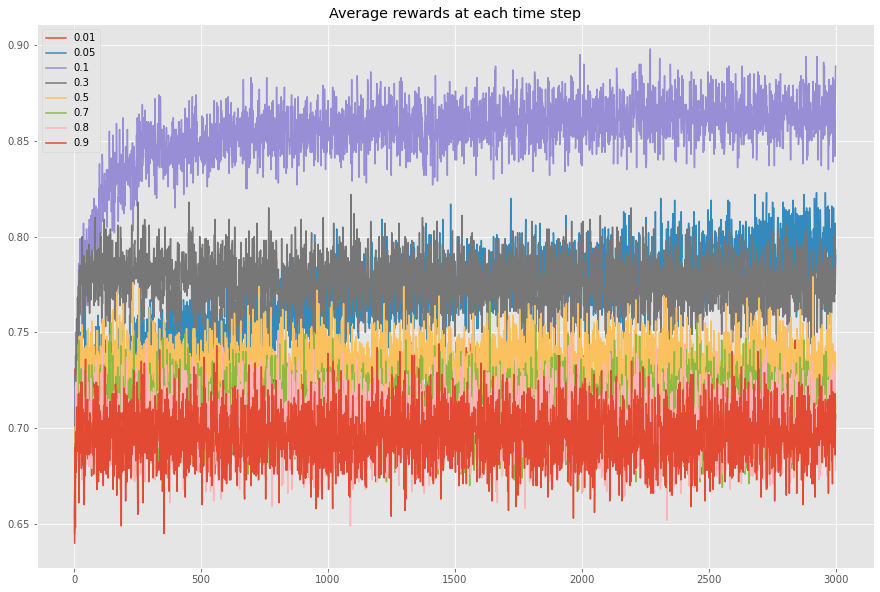

In [23]:
# plot the rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for epsilon in results_plot_softmax['temperature'].unique():
    results_softmax = results_plot_softmax[results_plot_softmax['temperature'] == epsilon]
    ax.plot(results_softmax['n_step'], results_softmax['rewards'],label=str(epsilon))

plt.legend()
plt.title("Average rewards at each time step")

In [24]:
# Determine the cumulative reward at 1000 time step
results_plot_softmax[results_plot_softmax["n_step"] == 3000]

,temperature,n_step,if_best_treatment,rewards,cumulative_rewards
2999,0.01,3000.0,0.360,0.705,2129.063
5999,0.05,3000.0,0.470,0.790,2309.836
8999,0.10,3000.0,0.692,0.889,2563.728
11999,0.30,3000.0,0.471,0.793,2328.518
14999,0.50,3000.0,0.380,0.739,2193.625
17999,0.70,3000.0,0.344,0.710,2129.130
20999,0.80,3000.0,0.325,0.678,2106.440
23999,0.90,3000.0,0.316,0.707,2090.329


Text(0.5, 1.0, 'Cumulative rewards at each step')

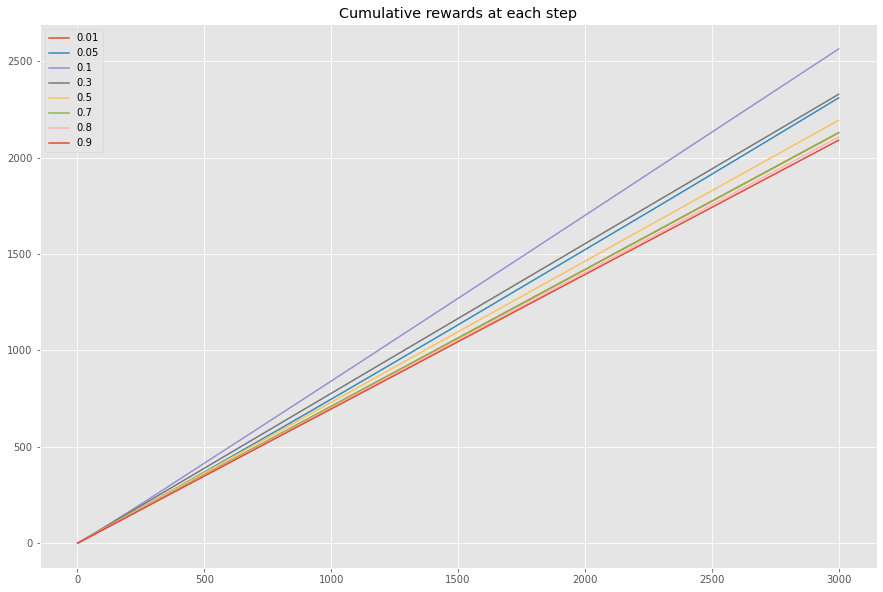

In [25]:
# Plot the cumulative rewards at each time step
plt.style.use('ggplot')

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for tau in results_plot_softmax['temperature'].unique():
    results_softmax = results_plot_softmax[results_plot_softmax['temperature'] == tau]
    ax.plot(results_softmax['n_step'], results_softmax['cumulative_rewards'], label = str(tau))

plt.legend()
plt.title("Cumulative rewards at each step")